#### File Organization
The raw HUSM dataset can be downloaded from: https://figshare.com/articles/dataset/EEG_Data_New/4244171/2, where the data is not organized into folders, so we'll use the `move_files` function from `preprocessing.py` to organize the data into two folders `MDD` and `HC` which represent Major Depressive Disorder and Healthy Controls respectively. The `move_files` function also creates subfolders within `MDD` and `HC`, each containing `EC`, `EO`, and `TASK` corresponding to different activities the subjects were engaged in: Eyes Closed, Eyes Open, or engaged in the P300 task.

In [ ]:
from preprocessing import move_files
source_directory = r"/Users/user/Documents/Data/HUSMdataset/..."
move_files(source_directory)

#### Loading Data with MNE
Here's an example of what the raw data looks like.

Extracting EDF parameters from /Users/xaviermootoo/Documents/Data/HUSM/MDD/EC/MDD S1 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77567  =      0.000 ...   302.996 secs...


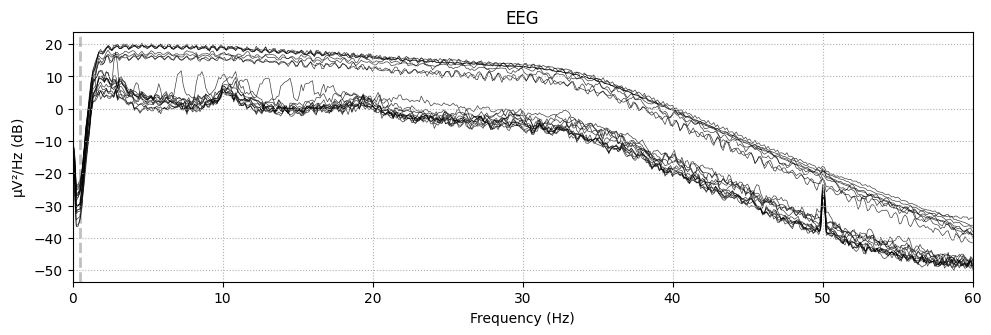

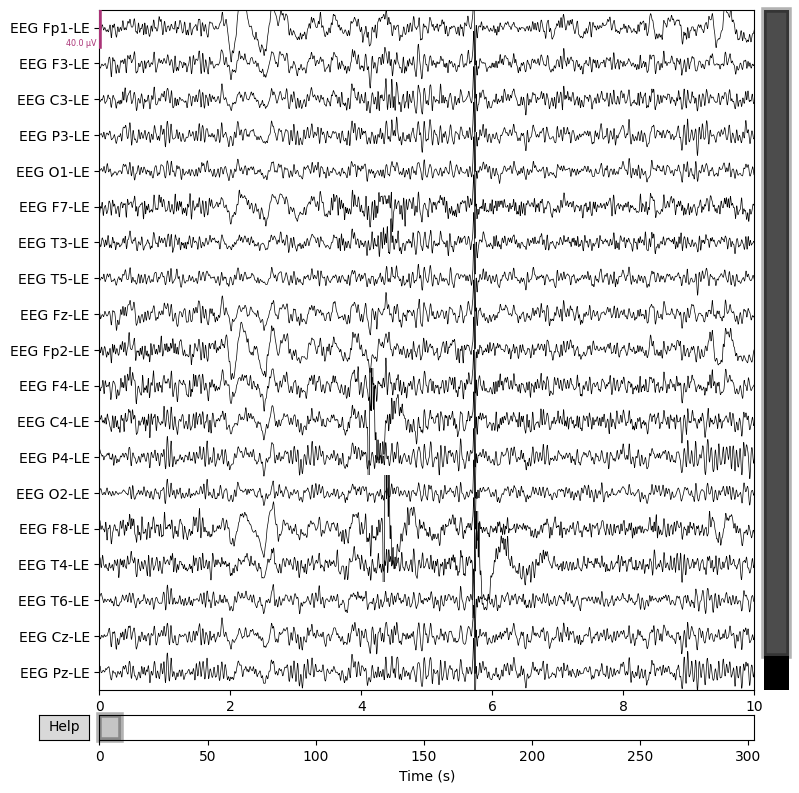

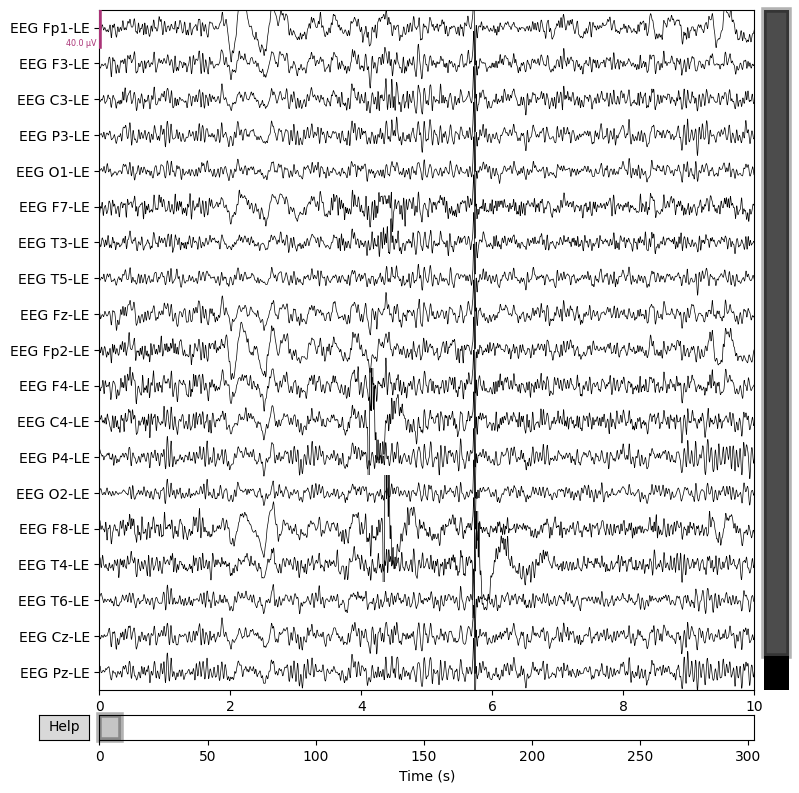

In [9]:
import mne
import numpy

test_file = r"/Users/xaviermootoo/Documents/Data/HUSM/MDD/EC/MDD S1 EC.edf"
raw = mne.io.read_raw_edf(test_file, preload=True)
raw_data = raw.get_data()
raw.plot(n_channels=19, title='Raw EEG Data', show=True, block=True)

#### Visualize the Spectrum

Effective window size : 8.000 (s)


/var/folders/vc/2cgy1_wn1z3fx52llvy0szgw0000gn/T/ipykernel_13963/3902939736.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=60).plot()
/Users/xaviermootoo/opt/anaconda3/envs/torch2_mps/lib/python3.10/site-packages/mne/viz/utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


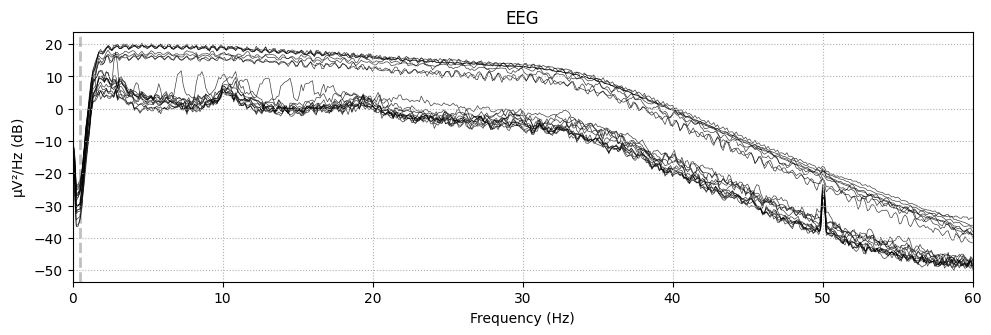

In [2]:
raw.compute_psd(fmax=60).plot()

#### Filter the Data
We see in our power spectrum 

In [11]:
def filter(data):
    # Input: numpy ndarray
    
    # Apply a high-pass filter at 0.5 Hz
    mne.filter.filter_data(data, sfreq = 256, l_freq=0.5, h_freq=None)

    # Apply a low-pass filter at 70 Hz
    mne.filter.filter_data(data, sfreq = 256, l_freq=None, h_freq=70)

    # Apply a notch filter at 50 Hz
    mne.filter.notch_filter(data, Fs = 256, freqs=50)

filter(raw_data)

Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 1691 samples (6.605 s)

Setting up low-pass filter at 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 78.75 Hz)
- Filter length: 49 samples (0.191 s)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with

In [12]:
raw.plot_spectrogram(ch_type='eeg', picks=['EEG 001'])

AttributeError: 'RawEDF' object has no attribute 'plot_spectrogram'